- Note: check alternative ARKS numbers to get more merge matches
- Consider if we want to include cats with CKD comorbidity in controls (for now no)

Predict if a cat will die of CKD (somewhat similar to survival analysis)

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
# read in unified animal list
file = '../Data/big_cats/Access_DB_table_exports/PrevalenceIncludedFelidsTZ_ZV_WA_SA_MG_DM.xlsx'
cats = pd.read_excel(file)

# read in lab visit data (we provcessed this in GROUP_merge_tables)
file = '../Data/big_cats/processed_data/merged_tables_tol_7days_2021-04-01.csv'
visits = pd.read_csv(file)

In [3]:
cats.head()

,Animal Name,ARKS Number,Microchip Number,Species (common name),Sex,Alternative ARKS Nos,Studbook Number,GAN ID,Status (alive/deceased/transacted),Zoo Location,Date of Birth,Date of Transaction,Date of Death,Age in years at death,Date of Onset of Azoatemia,"Date of USG less than 1,035",Ante-mortem Dx of CKD,Date of first low USG,Onset of azotaemia,Date of diagnosis,Comments re kidney function,First report of CKD CS,Age at Death,Cause of Death,Acute kidney failure,CKD - cause of mortality,CKD - co-morbidity,Pyometra (survived),Pyometra cause of death,Unknown,Neonatal,Neurological,Endocrine,Neoplasia,Old Age debility,Trauma,Infection,GIT,Respiratory/Cardiovascular,Pathology Report Numbers,Post Mortem Report Number,International transaction,Dam ARKS Number,Sire ARKS Number,Sibling ARKS Number,Transacted internationally,Hand-raised,Housing (confined enclosure/open range),Excluded from study?,Comments:,Biochem data,Urine data
0,Amber,800100,NaN,Lion,female,NaN,NaN,NaN,Dead,Taronga Zoo,1980-12-08,NaT,1982-04-24,1.375342,NaN,NaN,False,NaT,NaT,NaT,NaN,NaN,1y4m16d,euthanasia- renal failure,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,False,NaN,NaN,NaN,False,False,NaN,True,No biochem data. No clinical history. No PM re...,False,True
1,Askari,A49221,00-0643-10BA,Cheetah,male,NaN,6132,MIG12-029516691,Dead,Monarto Zoo,2004-09-11,NaT,2013-04-04,8.567123,NaN,NaN,False,2013-04-04,2013-03-03,NaT,NaN,NaN,8y6m22d,CKD and corneal ulcer,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,False,NaN,NaN,NaN,False,False,NaN,False,NaN,True,True
2,Audrey,890000,7F-7F4A-2238,Asiatic Lion,female,NaN,88,MIG12-25946946,Dead,Western Plains Zoo,1980-02-27,NaT,2001-07-03,21.361644,NaN,NaN,True,1998-05-28,2001-03-01,2001-03-01,NaN,NaN,NaN,CKD,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,False,NaN,NaN,NaN,True,False,NaN,False,"Born LincolnPark Zoo, Chicago",True,True
3,Bengal,K46,NaN,Bengal Tiger,male,NaN,NaN,NaN,Dead,Taronga Zoo,NaT,NaT,1973-05-23,NaN,NaN,NaN,True,NaT,NaT,1973-01-23,history of vomiting and anorexia,NaN,old,CKD,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,False,NaN,NaN,NaN,False,False,NaN,False,"PM report, but no USG or biochem",False,False
4,Blackfoot,K0095,NaN,Leopard,female,NaN,NaN,NaN,Dead,Taronga Zoo,1967-01-01,NaT,1986-12-24,19.991781,NaN,NaN,False,NaT,NaT,NaT,NaN,NaN,NaN,"kidney stones, haematuria, old age",False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,False,NaN,NaN,NaN,False,False,NaN,False,NaN,False,True


In [4]:
cat_cols = ['ARKS Number', 'Species (common name)', 'Sex','Date  of Birth', 'Date of Death', 'Age in years at death', 'Date of Onset of Azoatemia',
       'Date of USG less than 1,035', 'Ante-mortem Dx of CKD',
       'Date of first low USG', 'Onset of azotaemia', 'Date of diagnosis',
       'Comments re kidney function', 'First report of CKD CS', 'Age at Death',
       'Cause of Death', 'Acute kidney failure', 'CKD - cause of mortality',
       'CKD - co-morbidity', 'Excluded from study?']

In [5]:
# merge lab visit infor to unified animal list on ARKS number
df_ueber_data = pd.merge(left_on=['ARKS No'], right_on=['ARKS Number'], left=visits, right=cats[cat_cols])

In [6]:
len(cats['ARKS Number'].unique())

424

In [7]:
len(visits['ARKS No'].unique())

382

In [8]:
len(df_ueber_data['ARKS No'].unique())

329

In [9]:
cats['Excluded from study?'].value_counts()

False    409
True      15
Name: Excluded from study?, dtype: int64

In [10]:
df_ueber_data.sort_values(by=['ARKS No', 'Date'], inplace=True)

In [11]:
# cats dead from CKD
cases = df_ueber_data[(df_ueber_data['CKD - cause of mortality'] == True) & (~df_ueber_data['Date of Death'].isnull())]
cases['label'] = 1

# cats not dead from CKD but with date of death
controls = df_ueber_data[(df_ueber_data['CKD - cause of mortality'] == False) & (df_ueber_data['CKD - co-morbidity'] == False) &(~df_ueber_data['Date of Death'].isnull())]
controls['label'] = 0

/Users/ruth/miniconda3/envs/vetAI/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/ruth/miniconda3/envs/vetAI/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [12]:
print('cases')
print(len(cases))
print(len(cases['ARKS No'].unique()))
print('controls')
print(len(controls))
print(len(controls['ARKS No'].unique()))

cases
701
61
controls
352
77


In [19]:
sample_df = pd.concat([cases, controls], axis=0)

In [26]:
def cat_filter(df_in, exclude_delta_days):
    # make cols dataetime
    df_in['Date of Death'] = pd.to_datetime(df_in['Date of Death'])
    df_in['Date'] = pd.to_datetime(df_in['Date'])
    
    # make col
    df_in['number_days_before_death'] = (df_in['Date of Death'] - df_in['Date']).dt.days
    
    
    return df_in[df_in['number_days_before_death'] > exclude_delta_days]

In [42]:
num_case = []
num_control = []
    
num_case_2visit = []
num_control_2visit = []


for days in range(30, 1080, 30):
    
    sample = cat_filter(sample_df, days)
    sample_case = sample[sample['label']==1]
    sample_control = sample[sample['label']==0]
    
    num_case.append(len(sample_case['ARKS No'].unique()))
    num_control.append(len(sample_control['ARKS No'].unique()))
    
    # do smae for cats with min 2 visits
    cats_case = sample_case.groupby(['ARKS No']).size().reset_index(name='counts')
    num_case_2visit.append( len(cats_case[cats_case['counts']>1]))
    
    # do smae for cats with min 2 visits
    cats_control = sample_control.groupby(['ARKS No']).size().reset_index(name='counts')
    num_control_2visit.append( len(cats_control[cats_control['counts']>1]))
    

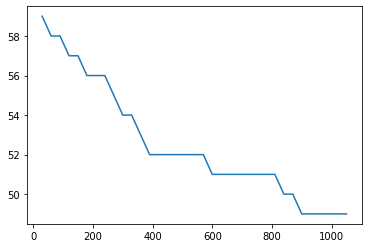

In [43]:
import matplotlib.pyplot as plt
plt.plot(range(30, 1080, 30), num_case)

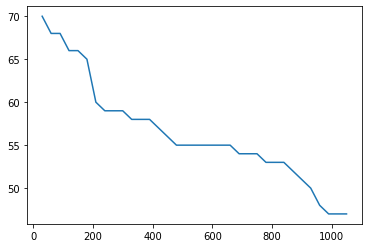

In [44]:
plt.plot(range(30, 1080, 30), num_control)

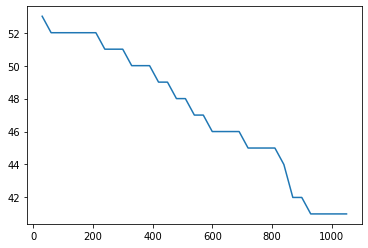

In [45]:
plt.plot(range(30, 1080, 30), num_case_2visit)

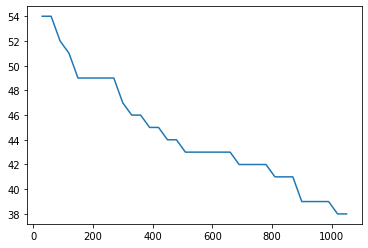

In [46]:
plt.plot(range(30, 1080, 30), num_control_2visit)